In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

In [3]:
raw = pd.read_csv("muon_data.data", delimiter = ' ')
#raw = raw[:1000000]
raw.rename(columns={'40000':'1', '1678879281':'2'},inplace=True)

In [4]:
decay_time = [] # muon decay time in nanoseconds
for value in raw['1']:
    if value < 40000:
        decay_time.append(value*1e-3) # in microseconds


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

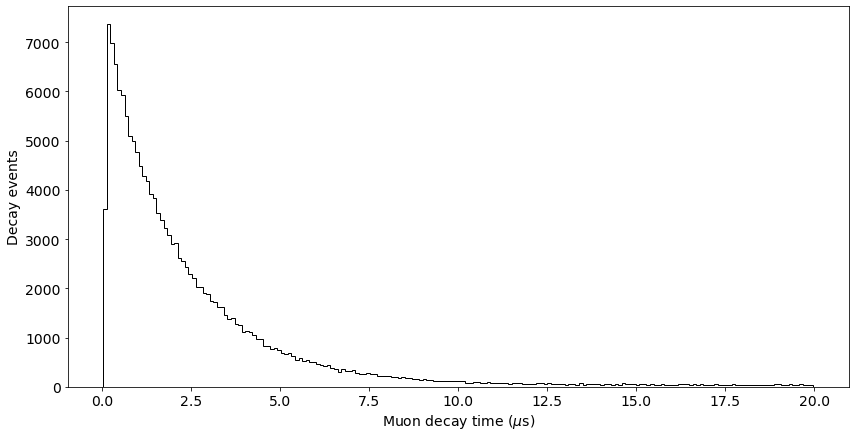

In [77]:
counts, plotbins = np.histogram(decay_time, bins=200)
counts[147] = 50

plt.figure(figsize=(14,7))
plt.stairs(counts, plotbins, color='k')
plt.xlabel('Muon decay time ($\mu$s)', size=14)
plt.xticks(size=14)
plt.ylabel('Decay events', size=14)
plt.yticks(size=14)

In [79]:
def func(x, a, b):
    return a * np.exp(-b * x)

[a,b], pcov = opt.curve_fit(func, plotbins[:-1], counts)

berr = np.sqrt(np.diag(pcov))[1]

C:\Users\howit\AppData\Local\Temp/ipykernel_6292/1332033596.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


In [80]:
lifetime = 1/b
lifetimeerr = berr/lifetime**2

lifetime, lifetimeerr

(2.2820164669335967, 0.0018166611974857337)

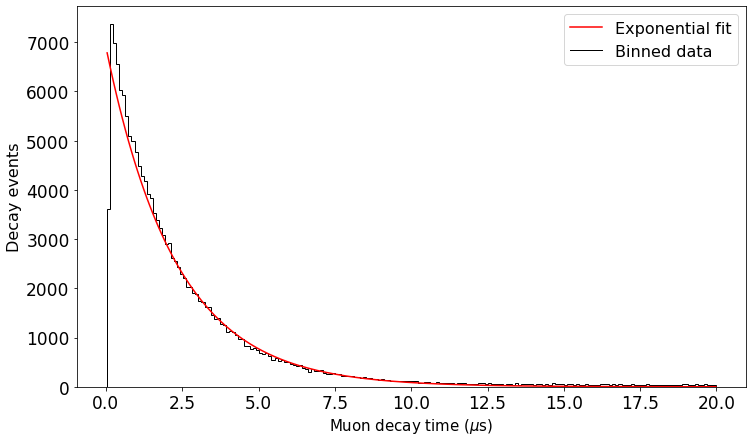

In [85]:
plt.figure(figsize=(12,7))
plt.stairs(counts, plotbins, color='k', label='Binned data')
plt.xlabel('Muon decay time ($\mu$s)', size=15)
plt.xticks(size=17)
plt.ylabel('Decay events', size=16)
plt.yticks(size=17)

plt.plot(plotbins, [func(bin, a, b) for bin in plotbins], color='r',label='Exponential fit')
plt.legend(fontsize=16)